In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

### 加载数据集

In [2]:
data_root = '.'  # 改成自己电脑上的路径即可
dataset = pd.read_csv(data_root + '/perfect_5.csv')
header = dataset.columns.values.tolist()
dataset.describe()

,vehicle_id,charge_start_time,charge_end_time,charge_duration,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_energy
count,172.0,1.720000e+02,1.720000e+02,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000
mean,5.0,2.017711e+13,2.017711e+13,2716.110465,93807.004651,138.541860,44.552326,92.116279,47.563953,557.552326,579.100000,-126.587209,-91.47093,38.755814,27.238372,60.479291
std,0.0,4.423509e+09,4.423505e+09,1704.842636,18672.648535,87.348396,16.058834,10.631982,20.967016,6.242183,10.429726,65.818805,88.61253,5.087391,5.620153,25.706147
min,5.0,2.017110e+13,2.017110e+13,240.000000,65877.400000,34.100000,20.000000,41.000000,4.000000,543.300000,561.000000,-200.000000,-199.00000,28.000000,13.000000,2.041000
25%,5.0,2.017121e+13,2.017121e+13,1572.500000,77089.175000,94.175000,31.000000,85.000000,35.000000,552.800000,572.775000,-189.000000,-189.25000,35.000000,23.750000,45.124750
50%,5.0,2.018020e+13,2.018020e+13,2240.000000,90870.650000,143.850000,42.000000,98.000000,46.500000,558.150000,575.050000,-151.000000,-39.50000,38.000000,27.000000,60.896000
75%,5.0,2.018050e+13,2.018050e+13,3635.000000,111906.300000,146.700000,54.000000,100.000000,68.000000,561.500000,587.325000,-69.500000,-5.00000,43.000000,31.000000,84.717750
max,5.0,2.018071e+13,2.018071e+13,6980.000000,128177.500000,869.000000,96.000000,100.000000,79.000000,585.100000,604.800000,-3.000000,-1.00000,50.000000,41.000000,100.792000


/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


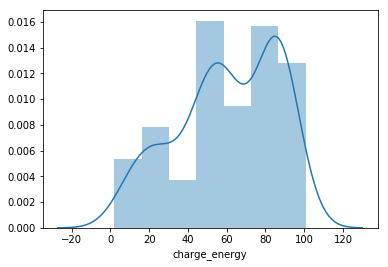

In [3]:
sns.distplot(dataset['charge_energy']);

### 特征选择

In [4]:
features = ['charge_duration', 'charge_start_soc', 'charge_start_U']
X = dataset[header[3:14]] # 
y = dataset[header[15]]

### 将数据区分为训练集和测试集

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(129, 11)
(129,)
(43, 11)
(43,)


### 数据标准化

In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_train_scaled

array([[-1.00590417,  1.37707404,  0.69965026, ..., -0.55172977,
        -0.77028433, -0.563786  ],
       [-1.33039519,  0.73466919, -0.94294493, ..., -0.76707967,
        -1.14435464,  0.22246691],
       [ 2.47657974,  0.01903231,  0.4996721 , ...,  1.60176918,
         0.98671261, -0.563786  ],
       ..., 
       [-0.58290696, -1.37730507,  0.12630247, ..., -0.05950144,
        -1.13301918,  0.81215659],
       [ 0.60496193, -0.11869767,  0.07775286, ...,  0.14046632,
         0.99804807, -0.76034923],
       [-0.72197454,  0.24018499,  1.77236549, ...,  1.41718356,
        -0.95165175, -1.35003891]])

### 参数选择

In [7]:
#导入sklearn库中的VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
#设置方差的阈值为0.08
sel = VarianceThreshold(threshold=0.08)
#选择方差大于0.08的特征
X_sel=sel.fit_transform(X_train.astype(np.float64))
X_sel.shape

(129, 11)

### 训练数据，使用多项式回归

In [8]:
from sklearn.preprocessing import PolynomialFeatures
featurizer = PolynomialFeatures(degree=2)
X_train_cubic = featurizer.fit_transform(X_train_scaled)
X_train_cubic.shape

(129, 78)

In [9]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_cubic, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 预测结果并评价
> [评价方法点击这里](https://blog.csdn.net/SA14023053/article/details/51707305)

In [10]:
#模型拟合测试集
X_test_cubic = featurizer.transform(scaler.transform(X_test))
y_pred = linreg.predict(X_test_cubic)

#评估模型
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# 用scikit-learn计算MAE
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
# 计算精确度
# for i in range(len(y_pred)):
#     if y_pred[i] < 0:
#         y_pred[i] = 0.04

error_array = np.array(((y_test - y_pred) / y_test))
error_rate = np.sqrt(np.sum(np.power(error_array,2)))
print("error_rate: %f" % error_rate)

MSE: 28.6460504093
RMSE: 5.35220052028
MAE: 3.31553488372
error_rate: 0.568509


### 真实值与预测值越接近y=x表明预测越准确

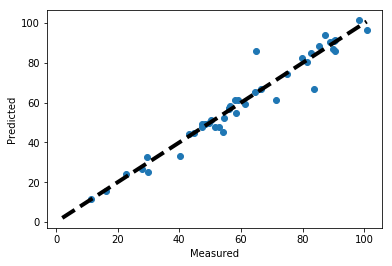

In [11]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### 探索性工作

In [12]:
'''
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
degrees = [2,3,5,10]
for degree in degrees:
    # 多项式
    featurizer = PolynomialFeatures(degree=degree)
    X_train_cubic = featurizer.fit_transform(X_train_scaled)

    # 线性回归
    linreg = LinearRegression()
    linreg.fit(X_train_cubic, y_train)
    
    #模型拟合测试集
    X_test_cubic = featurizer.transform(scaler.transform(X_test))
    y_pred = linreg.predict(X_test_cubic)

    #评估模型
    from sklearn import metrics
    # 用scikit-learn计算MSE
    print("MSE:",metrics.mean_squared_error(y_test, y_pred))
    # 用scikit-learn计算RMSE
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    # 用scikit-learn计算MAE
    print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
    # 计算精确度
    # for i in range(len(y_pred)):
    #     if y_pred[i] < 0:
    #         y_pred[i] = 0.04

    error_array = np.array(((y_test - y_pred) / y_test))
    error_rate = np.sqrt(np.sum(np.power(error_array,2)))
    print("error_rate: %f\n" % error_rate)
'''

'\nfrom sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.linear_model import LinearRegression\ndegrees = [2,3,5,10]\nfor degree in degrees:\n    # 多项式\n    featurizer = PolynomialFeatures(degree=degree)\n    X_train_cubic = featurizer.fit_transform(X_train_scaled)\n\n    # 线性回归\n    linreg = LinearRegression()\n    linreg.fit(X_train_cubic, y_train)\n    \n    #模型拟合测试集\n    X_test_cubic = featurizer.transform(scaler.transform(X_test))\n    y_pred = linreg.predict(X_test_cubic)\n\n    #评估模型\n    from sklearn import metrics\n    # 用scikit-learn计算MSE\n    print("MSE:",metrics.mean_squared_error(y_test, y_pred))\n    # 用scikit-learn计算RMSE\n    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))\n    # 用scikit-learn计算MAE\n    print("MAE:",metrics.mean_absolute_error(y_test, y_pred))\n    # 计算精确度\n    # for i in range(len(y_pred)):\n    #     if y_pred[i] < 0:\n    #         y_pred[i] = 0.04\n\n    error_array = np.array(((y_test - y_pred) / y_test))\n    error_ra

### Q-Q图（分位数概率分布）
> Q-Q图是一种散点图,对应于正态分布的Q-Q图,就是由标准正态分布的分位数为横坐标,样本值为纵坐标的散点图. 要利用QQ图鉴别样本数据是否近似于正态分布,只需看Q-Q图上的点是否近似地在一条直线附近,而且该直线的斜率为标准差,截距为均值. 用QQ图还可获得样本偏度和峰度的粗略信息.

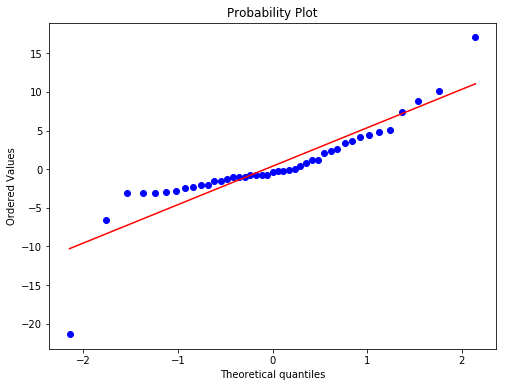

In [13]:
from scipy.stats import probplot
f = plt.figure(figsize=(8, 6))
ax = f.add_subplot(111)
probplot(y_test - y_pred, plot=ax);

### 残差直方图

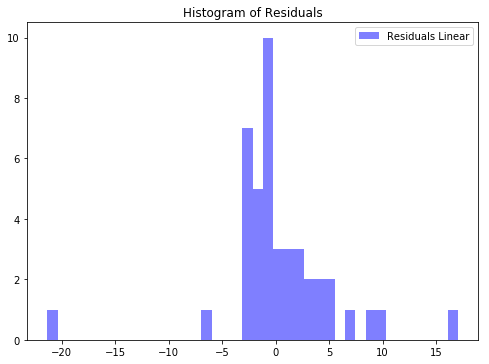

In [14]:
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(y_test - y_pred, bins=40, label='Residuals Linear', color='b', alpha=.5);
ax.set_title("Histogram of Residuals")
ax.legend(loc='best');

### 下面的内容是持续优化模型，交叉验证，可忽略

In [15]:
'''
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, featurizer.transform(scaler.transform(X)), y, cv=10)

from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y, predicted))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))
# 用scikit-learn计算MAE
print("MAE:",metrics.mean_absolute_error(y, predicted))
# 计算精确度
for i in range(len(predicted)):
    if predicted[i] < 0:
        predicted[i] = 0.4
error_array = np.array(((y - predicted) / y))
error_rate = np.sqrt(np.sum(np.power(error_array,2)))
print("error_rate: %f" % error_rate)
'''

'\nfrom sklearn.model_selection import cross_val_predict\npredicted = cross_val_predict(linreg, featurizer.transform(scaler.transform(X)), y, cv=10)\n\nfrom sklearn import metrics\n# 用scikit-learn计算MSE\nprint("MSE:",metrics.mean_squared_error(y, predicted))\n# 用scikit-learn计算RMSE\nprint("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))\n# 用scikit-learn计算MAE\nprint("MAE:",metrics.mean_absolute_error(y, predicted))\n# 计算精确度\nfor i in range(len(predicted)):\n    if predicted[i] < 0:\n        predicted[i] = 0.4\nerror_array = np.array(((y - predicted) / y))\nerror_rate = np.sqrt(np.sum(np.power(error_array,2)))\nprint("error_rate: %f" % error_rate)\n'

### 可视化预测结果

In [16]:
'''
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
'''

"\nfig, ax = plt.subplots()\nax.scatter(y, predicted)\nax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)\nax.set_xlabel('Measured')\nax.set_ylabel('Predicted')\nplt.show()\n"

In [17]:
dataset = pd.read_csv('../energy_predict_data/testB.csv')
pd.set_option('precision', 2)
header = dataset.columns.values.tolist()
dataset.describe()

,vehicle_id,charge_start_time,charge_end_time,mileage,charge_start_soc,charge_end_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp
count,27.00,2.70e+01,2.70e+01,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,3.44,2.02e+13,2.02e+13,102782.61,43.74,86.71,461.57,486.01,-60.94,-34.06,31.78,16.15
std,1.42,4.31e+09,4.31e+09,34057.19,14.32,15.94,99.50,93.22,67.60,57.02,11.38,14.05
min,1.00,2.02e+13,2.02e+13,56684.40,21.00,34.40,328.80,361.90,-197.00,-191.00,9.00,0.00
25%,2.50,2.02e+13,2.02e+13,75730.50,35.00,78.50,357.70,394.70,-90.00,-37.70,27.00,1.50
50%,4.00,2.02e+13,2.02e+13,95911.70,42.00,90.00,532.90,548.70,-26.00,-7.90,34.00,16.00
75%,5.00,2.02e+13,2.02e+13,120779.40,51.50,100.00,552.85,566.85,-12.35,-5.05,37.50,27.00
max,5.00,2.02e+13,2.02e+13,172178.00,73.00,100.00,566.20,600.60,-5.60,0.00,49.00,40.00


In [18]:
import time
# 将时间字符串转化为时间
def str2time(string):
    year = string[0:4]
    month = string[4:6]
    day = string[6:8]
    hour = string[8:10]
    minute = string[10:12]
    second = string[12:14]
    time_str = '%s-%s-%s %s:%s:%s' % (year, month, day, hour, minute, second)
    timestamp = time.mktime(time.strptime(time_str, '%Y-%m-%d %H:%M:%S'))  # 变为时间戳
    return int(timestamp)

# 将矩阵内的字符串转化为时间戳
def calVecTimeStamp(vector):
    timestamps = []
    for v in vector:
        timestamp = str2time(str(v))
        timestamps.append(timestamp)
    return timestamps

charge_end_time_array = np.array(calVecTimeStamp(dataset['charge_end_time']))
charge_start_time_array = np.array(calVecTimeStamp(dataset['charge_start_time']))
charge_start_soc_array = np.array(dataset['charge_start_soc'])
charge_end_soc_array = np.array(dataset['charge_end_soc'])
dataset['charge_duration'] = (charge_end_time_array - charge_start_time_array).tolist()
dataset['charge_delta_soc'] = (charge_end_soc_array - charge_start_soc_array).tolist()
header.insert(3, 'charge_duration')
header.insert(7, 'charge_delta_soc')
dataset = dataset[header]

In [19]:
# 数据转化
def standard_to_real(standard, mean, std):
    return standard * std + mean;